# Выбор региона перспективного для добычи нефти

# Описание проекта

Имеются пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов.  

**Цель**

- Построить модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль

**Задачи**

- Предобработка данных
- Обучение и проверка модели прогноза запасов сырья для каждого региона
- Подготовка данных к расчету прибыли
- Расчёт прибыли по выбранным скважинам и предсказаниям модели
- Подсчет рисков и прибыли для каждого региона

# Описание данных
**Признаки**
- id — уникальный идентификатор скважины
- f0, f1, f2 — три признака точек (неважно, что они означают, но сами признаки значимы)

**Целевой признак**
- product — объём запасов в скважине (тыс. баррелей)

**Источник данных:** Яндекс.Практикум

# Условия задачи:
- Для обучения модели подходит только линейная регрессия (остальные — недостаточно предсказуемые)
- При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки
- Бюджет на разработку скважин в регионе — 10 млрд рублей
- При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей
- После оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%. Среди них выбирают регион с наибольшей средней прибылью

# Использованные библиотеки

- pandas - 0.25.1
- matplotlib - 3.1.0
- seaborn - 0.11.2
- scikit-learn - 0.21.2


## Загрузка и подготовка данных

### Импорт и изучение данных

Импортируем необходимые библиотеки

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

Загрузим данные

In [2]:
try:
    df0 = pd.read_csv('/datasets/geo_data_0.csv')
    df1 = pd.read_csv('/datasets/geo_data_1.csv')
    df2 = pd.read_csv('/datasets/geo_data_2.csv')

except:
    df0 = pd.read_csv('geo_data_0.csv')
    df1 = pd.read_csv('geo_data_1.csv')
    df2 = pd.read_csv('geo_data_2.csv')

Настроим формат вывода вещественных чисел

In [3]:
pd.set_option('display.float_format', '{:,.2f}'.format)

Установим стиль для будущих графических построений

In [4]:
sns.set(style="dark", palette="pastel")
sns.set(font_scale = 1.15)

Создадим список, содержащий датасеты, для последующего перебора в цикле

In [5]:
data = [df0, df1, df2]

Создадим цикл для последовательного знакомства с датафреймами


 
 Рассмотрим датафрейм: df0


 Общая информация:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None

 Первые пять строк:


,id,f0,f1,f2,product
0,txEyH,0.71,-0.50,1.22,105.28
1,2acmU,1.33,-0.34,4.37,73.04
2,409Wp,1.02,0.15,1.42,85.27
3,iJLyR,-0.03,0.14,2.98,168.62
4,Xdl7t,1.99,0.16,4.75,154.04



 Описательные характеристики:


,f0,f1,f2,product
count,"100,000.00","100,000.00","100,000.00","100,000.00"
mean,0.50,0.25,2.50,92.50
std,0.87,0.50,3.25,44.29
min,-1.41,-0.85,-12.09,0.00
25%,-0.07,-0.20,0.29,56.50
50%,0.50,0.25,2.52,91.85
75%,1.07,0.70,4.72,128.56
max,2.36,1.34,16.00,185.36



 Проверим наличие явных дубликатов:
0

 Рассчитаем количество повторяющихся значений в признаке "id":
10

 
 Гистограммы распределения признаков в датафрейме df0



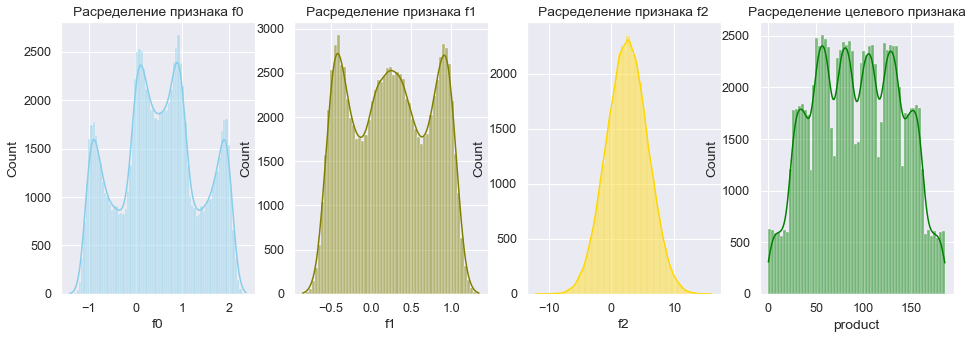


 
 Рассмотрим датафрейм: df1


 Общая информация:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None

 Первые пять строк:


,id,f0,f1,f2,product
0,kBEdx,-15.00,-8.28,-0.01,3.18
1,62mP7,14.27,-3.48,1.00,26.95
2,vyE1P,6.26,-5.95,5.00,134.77
3,KcrkZ,-13.08,-11.51,5.00,137.95
4,AHL4O,12.70,-8.15,5.00,134.77



 Описательные характеристики:


,f0,f1,f2,product
count,"100,000.00","100,000.00","100,000.00","100,000.00"
mean,1.14,-4.80,2.49,68.83
std,8.97,5.12,1.70,45.94
min,-31.61,-26.36,-0.02,0.00
25%,-6.30,-8.27,1.00,26.95
50%,1.15,-4.81,2.01,57.09
75%,8.62,-1.33,4.00,107.81
max,29.42,18.73,5.02,137.95



 Проверим наличие явных дубликатов:
0

 Рассчитаем количество повторяющихся значений в признаке "id":
4

 
 Гистограммы распределения признаков в датафрейме df1



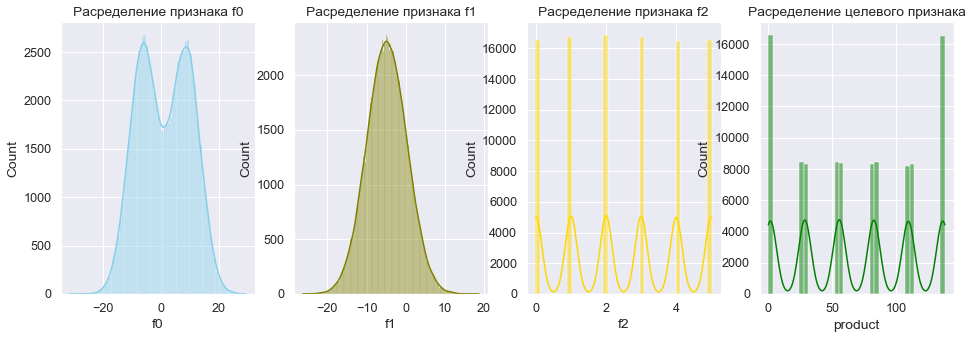


 
 Рассмотрим датафрейм: df2


 Общая информация:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None

 Первые пять строк:


,id,f0,f1,f2,product
0,fwXo0,-1.15,0.96,-0.83,27.76
1,WJtFt,0.26,0.27,-2.53,56.07
2,ovLUW,0.19,0.29,-5.59,62.87
3,q6cA6,2.24,-0.55,0.93,114.57
4,WPMUX,-0.52,1.72,5.90,149.60



 Описательные характеристики:


,f0,f1,f2,product
count,"100,000.00","100,000.00","100,000.00","100,000.00"
mean,0.00,-0.00,2.50,95.00
std,1.73,1.73,3.47,44.75
min,-8.76,-7.08,-11.97,0.00
25%,-1.16,-1.17,0.13,59.45
50%,0.01,-0.01,2.48,94.93
75%,1.16,1.16,4.86,130.60
max,7.24,7.84,16.74,190.03



 Проверим наличие явных дубликатов:
0

 Рассчитаем количество повторяющихся значений в признаке "id":
4

 
 Гистограммы распределения признаков в датафрейме df2



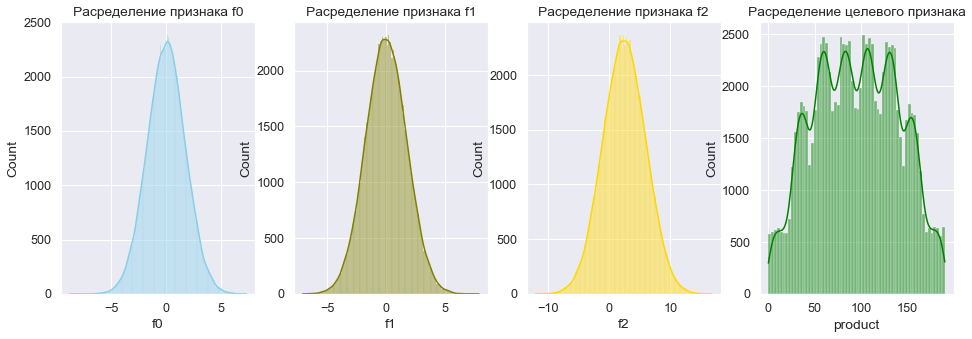

In [6]:
# Добавим счетчик
i = 0

# Создадим список с названиями датасетов
dfs_names = ['df0', 'df1', 'df2']

for df in data:
    
    # Выведем на экран основную информацию по датасету
    print(f'\n \n Рассмотрим датафрейм: {dfs_names[i]}\n')
    print('\n Общая информация:')
    print(df.info())
    print('\n Первые пять строк:')
    display(df.head())
    print('\n Описательные характеристики:')
    display(df.describe())
    
    # Проверим наличие дубликатов
    print('\n Проверим наличие явных дубликатов:')
    print(df.duplicated().sum())
    
    # Рассчитаем количество повторяющихся значений в признаке "id"
    print('\n Рассчитаем количество повторяющихся значений в признаке "id":')
    print(len(df) - len(df['id'].unique()))
    
    # Построим гистограммы распределения по каждому параметру
    print(f'\n \n Гистограммы распределения признаков в датафрейме {dfs_names[i]}\n')
    
    fig, axs = plt.subplots(1, 4, figsize=(16,5))

    axs[0].set_title('Расределение признака f0')
    sns.histplot(data=df, x='f0', kde=True, color="skyblue", label="f0", ax=axs[0])
    axs[1].set_title('Расределение признака f1')
    sns.histplot(data=df, x="f1", kde=True, color="olive", ax=axs[1])
    axs[2].set_title('Расределение признака f2')
    sns.histplot(data=df, x="f2", kde=True, color="gold", ax=axs[2])
    axs[3].set_title('Расределение целевого признака')
    sns.histplot(data=df, x="product", kde=True, color="green", ax=axs[3])
    plt.show()
    
    i += 1

### Результаты изучения данных
- Во всех датасетах отсутствуют пропущенные значения
- Признак `id` содержит записи в различном регистре, однако приведение к единому регистру выполнять нецелесообразно. Из-за вероятности получить ложные дубликаты
- В поле `id` встречаются повторы - возможно, отбор проб в отдельных скважинах проводился несколько раз. Признак `id` будет исключен из выборки, так как при построение модели линейной регрессии он не принесет пользы
- В данных отсутствуют явные дубликаты
- Типы признаков соответствуют их содержимому
- Распределение признаков по датасету `df0` симметрично относительно медианного значения, нормальное распределение характерно тольлко для признака `f2`
- Распределение признаков по датасету `df1` симметрично относительно медианного значения, нормальное распределение характерно тольлко для признака `f1`. Гистограмма для признак `f2` напоминает категориальное распределение
- Признаки по датасету `df2` распределены нормально и симметрично относительно медианного значения
- Распределение целевого признака у датафреймов `df0` и `df2` похожие, а у `df1` - имеет выбросы по краям

### Разделение датасетов 

Создадим список `data_all` для последующего перебора в цикле. Признак `id` исключим из выборки, так как он не принесет пользы при построении моделей

In [7]:
data_all = [df0.drop('id', axis=1), df1.drop('id', axis=1), df2.drop('id', axis=1)]

Разделим датасеты на обучающую и валидационную выборки в соотношении 75:25. Для автоматизации процесса создадим цикл, предварительно создав пустые списки для признаков и целевых признаков

In [8]:
features_all = []
target_all = []

Создадим пустые списки для признаков и целевых признаков

In [9]:
# Цикл перебирает датасеты, каждый соответствует определенному региону 
for region in data_all:
    
    # Создадим переменные для признаков и целевого признака
    features = region.drop('product', axis=1)
    target = region[['product']]
    
    # Разделим данные на обучающую и валидационную выборки
    features_train, features_valid, target_train, target_valid = train_test_split(
        features, target, test_size=0.25, random_state=12345)
    
    # Добавим выборки в соответствующие списки
    features_all.append([features_train, features_valid])
    target_all.append([target_train, target_valid])

Проверим количество объектов в получившихся выборках. Воспользуемся циклом

In [11]:
i=0
for features_train, features_valid in features_all:
    print('\n Количество объектов в выборках признаков (features) для региона {0}:'.format(i))
    print('    Обучающая выборка: {0}'.format(len(features_train)))
    print('    Валидационная выборка: {0}'.format(len(features_valid)))
    i +=1
    
i=0
for target_train, target_valid in target_all:
    print('\nКоличество объектов в выборках целевого признака (target) для региона {0}:'.format(i))
    print('    Обучающая выборка: {0}'.format(len(target_train)))
    print('    Валидационная выборка: {0}'.format(len(target_valid)))
    i +=1


 Количество объектов в выборках признаков (features) для региона 0:
    Обучающая выборка: 75000
    Валидационная выборка: 25000

 Количество объектов в выборках признаков (features) для региона 1:
    Обучающая выборка: 75000
    Валидационная выборка: 25000

 Количество объектов в выборках признаков (features) для региона 2:
    Обучающая выборка: 75000
    Валидационная выборка: 25000

Количество объектов в выборках целевого признака (target) для региона 0:
    Обучающая выборка: 75000
    Валидационная выборка: 25000

Количество объектов в выборках целевого признака (target) для региона 1:
    Обучающая выборка: 75000
    Валидационная выборка: 25000

Количество объектов в выборках целевого признака (target) для региона 2:
    Обучающая выборка: 75000
    Валидационная выборка: 25000


Получили два списка: `features_all` и `target_all`. Первый содержит **признаки** обучающей и валидационной выборок для каждого региона. Список `target_all` содержит **целевые признаки** обучающей и валидационной выборок для каждого региона. Разбиение на выборки прошло успешно. Приступим к обучению и проверки модели линейной регрессии

## Обучение и проверка модели

Обучим модель линейной регрессии на тренировочных данных и предскажем объем запасов на валидационной выборке

Создадим список `predicted_all`, в который запишем предсказания по трем регионам. Для этого воспользуемся циклом

In [12]:
predicted_all = []

Цикл выполнит следующие действия для каждого региона:
- обучит модель линейной регрессии на тренировочных данных
- сделает предсказания на валидационной выборке
- рассчитает корень из среднеквадратичного отклонения - `rmse`
- добавит предсказания в список `predicted_all`
- выведет на экран `среднее из предсказанных значений` и `rmse`

In [13]:
for region in range(len(features_all)):
    
    # Создадим модель
    model = LinearRegression()
    
    # Обучим модель
    model.fit(features_all[region][0], target_all[region][0])
    
    # Сделаем предсказания
    predicted_valid = model.predict(features_all[region][1])
    
    # Рассчитаем rmse
    rmse = (mean_squared_error(target_all[region][1], predicted_valid)) ** 0.5
    
    # Добавим результаты предсказания в список predicted_all
    predicted_all.append([predicted_valid])
    
    # Выведем результаты на экран
    print('\nРегион {0}'.format(region))
    print('Среднее значение предсказанных запасов сырья: {0:.3f}'.format(predicted_valid.mean()))
    print('Корень из среднеквадратичного отклонения (RMSE): {0:.3f}'.format(rmse))


Регион 0
Среднее значение предсказанного сырья: 92.593
Корень из среднеквадратичного отклонения: 37.579

Регион 1
Среднее значение предсказанного сырья: 68.729
Корень из среднеквадратичного отклонения: 0.893

Регион 2
Среднее значение предсказанного сырья: 94.965
Корень из среднеквадратичного отклонения: 40.030


**Промежуточные выводы:**
- Получены схожие результаты предсказания по регионам 0 и 2 - среднее значение составляет порядка 93, а параметр `rmse` - 38. Вероятнее всего это связано с характером распределения целевого признака для этих регионов в исходных данных.
- Среднее значение для региона 1 - 68.729, а `rmse` - 0.893

## Подготовка к расчёту прибыли

### Создание переменных необходимых для расчета прибыли

Создадим переменную `COST` - стоимость тысячи баррелей

In [14]:
COST = 450000

Бюджет на разработку скважин в регионе - `BUDGET`

In [15]:
BUDGET = 10**10

Количество скважин для разработки в регионе - `N_BOREHOLES`

In [16]:
N_BOREHOLES = 200

Рассчитаем достаточный объём сырья для безубыточной разработки новой скважины - `min_product`

In [17]:
min_product = (BUDGET/N_BOREHOLES)/COST

Сравним полученный объём сырья со средним запасом в каждом регионе

In [18]:
print('Средние предсказанные объемы: регион 0 - {0:.3f}, регион 1 - {1:.3f}, регион 2 - {2:.3f}'
      .format(predicted_all[0][0].mean(), predicted_all[1][0].mean(), predicted_all[2][0].mean()))
print('Минимальный объем для разработки без убытков: {0:.3f}'.format(min_product))

Средние предсказанные объемы: регион 0 - 92.593, регион 1 - 68.729, регион 2 - 94.965
Минимальный объем для разработки без убытков: 111.111


**Промежуточный вывод**
- Средний запас каждого региона ниже достаточного для безубыточной разработки

## Расчёт прибыли по выбранным скважинам

 Выберем скважины с максимальными значениями предсказаний

Создадим пустые списки. Позднее в список `top_boreholes_predict` запишем предсказанные объемы для 200 наиболее перспективных скважин, а в `top_boreholes_target` - реальные запасы в скважинах из списка `top_boreholes_predict` 

In [19]:
top_boreholes_predict = []
top_boreholes_target = []

In [21]:
# Создадим переменную для определения позиции в списке
i = 0
n = 0

# Количество скважин 
count = 200

# Создадим цикл, перебирающий регионы из списка predicted_all
for region in predicted_all:
    # Создадим переменную с датафреймами с предсказанными и реальными значениями запасов по региону
    pred_region_data = pd.DataFrame(region[i]).reset_index(drop=True)
    target_valid_region = pd.DataFrame(target_all[n][1]).reset_index(drop=True)
    
    # Создадим переменную с отсоритированными данными
    # При этом сбросим индексы, чтобы во вложенном цикле использовать новую нумерацию    
    joined_target_pred = (pred_region_data.join(target_valid_region, lsuffix='_x')
                          .sort_values(by=i, ascending=False).reset_index(drop=True))
        
    # Создадим промежуточные списки, чтобы общие списки добавлять сразу по 200 значений    
    boreholes_count = []
    target_count_product = [] 
    
    # Вложенный цикл для перебора первых count строк
    for borehole in range(count):
        
        # Добавим значения в промежуточные списки
        boreholes_count.append(joined_target_pred[i][borehole])
        target_count_product.append(joined_target_pred['product'][borehole])
    
    # Добавим информацию по топ-200 скважин для данного региона в общий список    
    top_boreholes_predict.append(boreholes_count)
    top_boreholes_target.append(target_count_product)
    n += 1

Проверим полученные данные, построив линейные графики по каждому региону

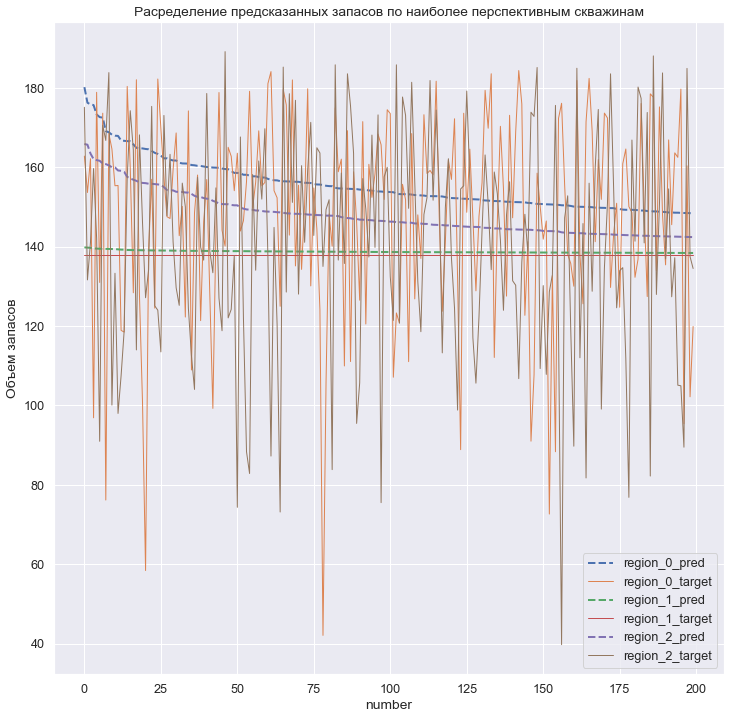

In [31]:
fig, ax = plt.subplots(figsize=(12,12))

# region_0
ax.plot(pd.DataFrame(top_boreholes_predict[0])
        .index, pd.DataFrame(top_boreholes_predict[0]), label='region_0_pred', ls='--', lw=2)
ax.plot(pd.DataFrame(top_boreholes_target[0])
        .index,pd.DataFrame(top_boreholes_target[0]), label='region_0_target', lw=1)

# region_1
ax.plot(pd.DataFrame(top_boreholes_predict[1])
        .index,pd.DataFrame(top_boreholes_predict[1]), label='region_1_pred', ls='--', lw=2)
ax.plot(pd.DataFrame(top_boreholes_target[1])
        .index,pd.DataFrame(top_boreholes_target[1]), label='region_1_target', lw=1)

# region_2 
ax.plot(pd.DataFrame(top_boreholes_predict[2])
        .index,pd.DataFrame(top_boreholes_predict[2]), label='region_2_pred', ls='--', lw=2)
ax.plot(pd.DataFrame(top_boreholes_target[2])
        .index,pd.DataFrame(top_boreholes_target[2]), label='region_2_target', lw=1)

ax.set_xlabel('number')
ax.set_ylabel('Объем запасов')
ax.set_title("Расределение предсказанных запасов по наиболее перспективным скважинам")
ax.legend();

**Промежуточные выводы**
- Получили распределение предсказанных и реальных объемов в скважинах по трем регионам
- В регионах 0 и 2 наблюдается значительный разброс реальных запасов относительно предсказанных. Этим же регионам соответствовали большие значения `rmse`
- График реальных запасов по региону 1 повторяет предсказанные значения по данному региону
- Предсказанные запасы всех скважин превышают объем достаточный для безубыточной разработки
- Нулевой регион лидирует по объемам предсказанных запасов


**Рассчитаем суммарное количество реальных запасов в выделенных скважинах**

In [32]:
print('Реальные запасы по 200 скважинам в регионе 0: {0:.3f}'.format(pd.Series(top_boreholes_target[0]).sum()))
print('Реальные запасы по 200 скважинам в регионе 1: {0:.3f}'.format(pd.Series(top_boreholes_target[1]).sum()))
print('Реальные запасы по 200 скважинам в регионе 2: {0:.3f}'.format(pd.Series(top_boreholes_target[2]).sum()))

Реальные запасы по 200 скважинам в регионе 0: 29601.836
Реальные запасы по 200 скважинам в регионе 1: 27589.082
Реальные запасы по 200 скважинам в регионе 2: 28245.222


**Рассчитаем прибыль для полученного объема сырья**

In [33]:
def profit(region):
    
    # Рассчитаем объем запасов для данного региона 
    volume = pd.Series(top_boreholes_target[region]).sum()
    
    # Рассчитаем доход, переменная 'COST' равна 450000 и соответствует стоимости 1 тыс баррелей
    # BUDGET=10 млрд, расходы на добычу в регионе
    income = volume * COST - BUDGET
           
    return income

In [34]:
print('Доход по региону 0: {0:.2f} рублей'.format(profit(0)))
print('Доход по региону 1: {0:.2f} рублей'.format(profit(1)))
print('Доход по региону 2: {0:.2f} рублей'.format(profit(2)))

Доход по региону 0: 3320826043.14 рублей
Доход по региону 1: 2415086696.68 рублей
Доход по региону 2: 2710349963.60 рублей


## Расчёт прибыли и рисков по регионам

Рассчитаем прибыль и риски, используя технику `bootstrap`. Создадим тысячю выборок для каждого региона и рассчитаем величину доходов и рисков для всех выборок

Создадим переменную `state`, которая при каждом вызове выдает случайное значение 

In [35]:
state = np.random.RandomState(12345)

Предыдущая функция `revenue` была адаптирована под определенную структуру данных и не подходит для будущих вычислений. Создадим новую функцию рассчета прибыли - `profit_estimation`, на вход которой могут подаваться данные разной длины. 

In [36]:
# Создадим функцию
def profit_estimation(target, predictions, count):
    
    # Отсортируем предсказания по убыванию
    predictions_sorted = predictions.sort_values(ascending=False)
    
    # Выделим первые значения. Количество определяется параметром 'count'
    selected = target[predictions_sorted.index][:count]
    
    # Рассчитаем прибыль для данной выборки и вернем результат 
    return ((COST * selected.sum()) - BUDGET)

Создадим пустой список `total_income`, куда будем добавлять результаты расчета по каждой выборке

In [37]:
total_income = []

Создадим функцию `risk_estimation` для оценки средней прибыли по региону и рисков инвестирования. Под риском следует понимать вероятность убытка, т.е. доля выборок с отрицательной прибылью относительно всех выборок для данного региона

In [38]:
# Создадим функцию
def risk_estimation(target, predict):
    
    # Создадим пустые списки
    lower_q = []
    upper_q = []
    profit = []
    risk_per = []
    
    # Создадим списки для обозначения регионов в итоговой таблице
    regions = ['region_0', 'region_1', 'region_2']
    
    # Создадим цикл для перебора регионов
    for region in range(len(target)):
        
        # Создадим выборки с реальными и предсказанными запасами по регионам
        # Предварительно преобразуем список в датафрейм, чтобы сбросить индексы
        # Затем сожмем выборку методом 'squeeze'
        target_r = pd.DataFrame(target[region][1]).reset_index(drop=True).squeeze()
        pred_r = pd.DataFrame(predict[region][0]).reset_index(drop=True).squeeze()
        
        # Создадим пустой список 'region_income', в котором будет хранится прибыль 
        # для данного региона по 1000 выборок
        region_income = []
        
        # Создадим цикл, который создаст тысячю выборок для каждого региона
        for i in range(1000):
            
            # Создадим целевую выборку из 500 объектов, с возможностью повторов
            sample_target = target_r.sample(n=500, replace=True, random_state=state)
            
            # Создадим предсказанную выборку так, чтобы индексы соответствовали целевой
            sample_pred = pred_r[sample_target.index]
            
            # Обратимся к функции 'profit_estimation' и добавим результат к списку 'region_income'
            region_income.append(profit_estimation(sample_target, sample_pred, 200))
        
        # Добавим прибыль по 1000 выборок в список 'total_income'
        total_income.append(region_income)
        
        # Рассчитаем нижний и вехний пределы 95% доверительного интервала
        lower_q.append(pd.Series(region_income).quantile(0.025))
        upper_q.append(pd.Series(region_income).quantile(0.975))
        
        # Рассчитаем и добавим в список 'profit' среднее значение прибыли для данного региона
        profit.append(pd.Series(region_income).mean())
        
        # Рассчитаем и добавим в список 'risk_per' риск получить убыток в процентах
        risk_per.append((((pd.Series(region_income) < 0).sum()) / len(pd.Series(region_income)))*100)
    
    # Создадим итоговую таблицу, содержащую верхний и нижний пределы доверительного интервала,
    # средний доход и риски вложений для каждого региона
    result = pd.DataFrame({'region':regions, 'lower_q':lower_q, 'upper_q': upper_q, 'profit':profit, 
                           'risk_percentage':risk_per})
    
    # Вернем итоговую таблицу
    return result

Обратимся к фунции оценки прибыли и рисков `risk_estimation`. На вход функции подадим списки с реальными и предсказанными запасами 

In [39]:
%%time
risk_estimation(target_all, predicted_all)

Wall time: 26.4 s


,region,lower_q,upper_q,profit,risk_percentage
0,region_0,"-102,090,094.84","947,976,353.36","425,938,526.91",6.00
1,region_1,"128,123,231.43","953,612,982.07","518,259,493.70",0.30
2,region_2,"-115,852,609.16","989,629,939.84","420,194,005.34",6.20


### Выводы
- Получили итоговую таблицу, содержащую верхний и нижний пределы доверительного интервала, средний доход и риски вложений для каждого региона
- Разработка регионов 0 и 2 имеет относительно высокие риски, что связано с неравномерным распределением реальных запасов. При прогнозе запасов данные регионы характеризуются высокими значениями среднеквадратичного отклонения   

- **Наиболее перспективным для разработки является регион 1.** Риск убытков для данного региона не превышает 2.5%, что удовлетворяет условию задачи